# Proyek Analisis Data: [Brazilian E-Commerce Public Dataset by Olist]
- **Nama:** [Adinda Putri Hermawan]
- **Email:** [adindaputrihermawan28@gmail.com]
- **ID Dicoding:** [adindaaaa]

## Menentukan Pertanyaan Bisnis

- Item apa yang memiliki tingkat penjualan tertinggi?
- Bagaimana Demografi Pelanggan yang Kita Miliki berdasarkan kota dan negara bagian?
- Tipe pembayaran apa yang sering digunakan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import streamlit as st
from datetime import datetime
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df1 = pd.read_csv("/content/olist_customers_dataset.csv")
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Insight:**
- Dapat digunakan untuk analisis distribusi customer berdasarkan kota
- Dapat digunakan untuk analisis distribusi customer berdasarkan negara bagian

In [ ]:
df2 = pd.read_csv("/content/olist_order_items_dataset.csv")
df2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Insight:**
- Dapat digunakan untuk analisis distribusi price/harga
- Dapat digunakan untuk analisis distribusi freight_value

In [ ]:
df3 = pd.read_csv("/content/olist_orders_dataset.csv")
df3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
35429,e0ee4258e269f1bb1f882f851b05bafa,ccc35ad52db11ea0aca08a8662cfb048,delivered,2018-02-09 07:04:02,2018-02-10 02:49:28,2018-02-15 15:17:43,2018-03-14 17:06:33,2018-03-15 00:00:00
35430,57403600149411ebe00580622d55a65c,cee6807aacc85c9f6272230e3f1a2283,delivered,2018-01-06 07:49:02,2018-01-06 08:08:14,2018-01-09 17:53:05,2018-01-11 16:43:12,2018-01-26 00:00:00
35431,46cdb74fc020d853a9d8d5100b77dfe5,d399f99a4070fd5fdcd24f4d7f43a217,delivered,2018-02-16 10:13:03,2018-02-16 10:27:58,2018-02-21 20:58:57,2018-02-27 12:34:04,2018-03-14 00:00:00
35432,a0257c63797f7dfa662f7c6fa6af1cc3,29e7a938492cb8122fce44bbe605f274,delivered,2018-07-20 15:14:29,2018-07-21 03:05:09,2018-07-24 08:30:00,2018-07-27 10:51:03,2018-08-08 00:00:00


In [ ]:
df4 = pd.read_csv("/content/olist_order_payments_dataset.csv")
df4

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df5 = pd.read_csv("/content/olist_products_dataset.csv")
df5

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df6 = pd.read_csv("/content/product_category_name_translation.csv")
df6

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
df7 = pd.read_csv("/content/olist_sellers_dataset.csv")
df7

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Assessing Data

### Info data

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35434 entries, 0 to 35433
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       35434 non-null  object
 1   customer_id                    35434 non-null  object
 2   order_status                   35434 non-null  object
 3   order_purchase_timestamp       35434 non-null  object
 4   order_approved_at              35370 non-null  object
 5   order_delivered_carrier_date   34816 non-null  object
 6   order_delivered_customer_date  34376 non-null  object
 7   order_estimated_delivery_date  35433 non-null  object
dtypes: object(8)
memory usage: 2.2+ MB


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Cek missing value

In [ ]:
df1.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
df2.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
df3.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,64
order_delivered_carrier_date,618
order_delivered_customer_date,1058
order_estimated_delivery_date,1


In [ ]:
df4.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
df5.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
df6.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
df7.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


#### Cek duplikat data

In [ ]:
print("Jumlah duplikasi: ", df1.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", df2.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", df3.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", df4.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", df5.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", df6.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", df7.duplicated().sum())

Jumlah duplikasi:  0


#### Describe data

In [ ]:
df1.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
df2.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
df3.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,35434,35434,35434,35434,35370,34816,34376,35433
unique,35434,35434,7,35366,34098,31830,34245,440
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-30 13:30:58,2017-11-07 07:30:38,2018-05-10 18:29:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,1,1,34377,2,6,18,3,214


In [ ]:
df4.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
df5.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
df6.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
df7.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

terdapat missing value pada data df3 atau data orders dan df5 pada data product

In [ ]:
df3=df3.dropna()
df3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
35428,f64d913f55a51b368d17498f8cdef01d,c777b902d1733ccee3c92bc2c451538f,delivered,2018-01-08 09:05:10,2018-01-08 09:16:20,2018-01-09 20:22:34,2018-01-10 16:32:24,2018-01-30 00:00:00
35429,e0ee4258e269f1bb1f882f851b05bafa,ccc35ad52db11ea0aca08a8662cfb048,delivered,2018-02-09 07:04:02,2018-02-10 02:49:28,2018-02-15 15:17:43,2018-03-14 17:06:33,2018-03-15 00:00:00
35430,57403600149411ebe00580622d55a65c,cee6807aacc85c9f6272230e3f1a2283,delivered,2018-01-06 07:49:02,2018-01-06 08:08:14,2018-01-09 17:53:05,2018-01-11 16:43:12,2018-01-26 00:00:00
35431,46cdb74fc020d853a9d8d5100b77dfe5,d399f99a4070fd5fdcd24f4d7f43a217,delivered,2018-02-16 10:13:03,2018-02-16 10:27:58,2018-02-21 20:58:57,2018-02-27 12:34:04,2018-03-14 00:00:00


In [ ]:
df5=df5.dropna()
df5

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


mengubah type data pada shipping limit date yang semula objek menjadi type data datetime pada data order_item atau df2

In [ ]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  df2[column] = pd.to_datetime(df2[column])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


mengubah type data menjadi datetime pada data df3 atau data orders

In [ ]:
datetime2 = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime2:
  df3[column] = pd.to_datetime(df3[column])

df3.info()

<ipython-input-41-55d0140154ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column] = pd.to_datetime(df3[column])
<ipython-input-41-55d0140154ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column] = pd.to_datetime(df3[column])
<ipython-input-41-55d0140154ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<class 'pandas.core.frame.DataFrame'>
Index: 34370 entries, 0 to 35432
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       34370 non-null  object        
 1   customer_id                    34370 non-null  object        
 2   order_status                   34370 non-null  object        
 3   order_purchase_timestamp       34370 non-null  datetime64[ns]
 4   order_approved_at              34370 non-null  datetime64[ns]
 5   order_delivered_carrier_date   34370 non-null  datetime64[ns]
 6   order_delivered_customer_date  34370 non-null  datetime64[ns]
 7   order_estimated_delivery_date  34370 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 3.4+ MB


## Exploratory Data Analysis (EDA)

### Explore Customers

In [ ]:
df1.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


berdasarkan parameter statistik diatas diperoleh jika terdapat 99441 customer yang berbeda dengan 99441 kota dan negara bagian

In [ ]:
df1.customer_id.is_unique

True

In [ ]:
df1.customer_state.value_counts()

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [ ]:
# Cek jumlah unique values untuk kolom kategorikal
print(df1[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']].nunique())

customer_id           99441
customer_unique_id    96096
customer_city          4119
customer_state           27
dtype: int64


In [ ]:
df1.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


### Explore Items & Seller

In [ ]:
df8 = pd.merge(
    left=df2,
    right=df7,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
df8.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
df8.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


### Orders

In [ ]:
df3.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,34370,34370,34370,34370,34370,34370,34370,34370
unique,34370,34370,2,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,34368,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 03:28:33.141547776,2018-01-02 13:40:47.611405312,2018-01-05 09:29:54.543293696,2018-01-14 15:13:43.237707264,2018-01-25 19:31:26.412569088
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 14:46:49,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-15 09:10:02,2017-09-15 12:38:59.500000,2017-09-18 21:35:43.750000128,2017-09-26 20:20:18.249999872,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 09:56:16.500000,2018-01-20 16:50:27,2018-01-24 01:18:37.500000,2018-02-02 20:40:32.500000,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 17:42:08.249999872,2018-05-06 10:28:30,2018-05-08 14:07:45,2018-05-15 23:08:54.750000128,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 14:18:28,2018-08-29 14:31:07,2018-09-03 12:56:00,2018-10-17 13:22:46,2018-10-15 00:00:00


In [ ]:
# Cek jumlah unique values untuk kolom kategorikal
print(df3['order_status'].value_counts())

order_status
delivered    34368
canceled         2
Name: count, dtype: int64


In [ ]:
delivery_time = df3["order_delivered_customer_date"] - df3["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
df3["delivery_time"] = round(delivery_time/86400)
df3

<ipython-input-51-91d6588fde93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["delivery_time"] = round(delivery_time/86400)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0
...,...,...,...,...,...,...,...,...,...
35428,f64d913f55a51b368d17498f8cdef01d,c777b902d1733ccee3c92bc2c451538f,delivered,2018-01-08 09:05:10,2018-01-08 09:16:20,2018-01-09 20:22:34,2018-01-10 16:32:24,2018-01-30,1.0
35429,e0ee4258e269f1bb1f882f851b05bafa,ccc35ad52db11ea0aca08a8662cfb048,delivered,2018-02-09 07:04:02,2018-02-10 02:49:28,2018-02-15 15:17:43,2018-03-14 17:06:33,2018-03-15,27.0
35430,57403600149411ebe00580622d55a65c,cee6807aacc85c9f6272230e3f1a2283,delivered,2018-01-06 07:49:02,2018-01-06 08:08:14,2018-01-09 17:53:05,2018-01-11 16:43:12,2018-01-26,2.0
35431,46cdb74fc020d853a9d8d5100b77dfe5,d399f99a4070fd5fdcd24f4d7f43a217,delivered,2018-02-16 10:13:03,2018-02-16 10:27:58,2018-02-21 20:58:57,2018-02-27 12:34:04,2018-03-14,6.0


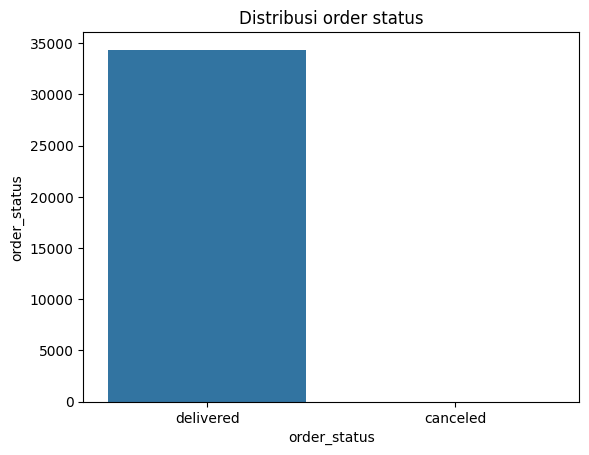

In [ ]:
# Plot distribusi payment_type
sns.countplot(x=df3['order_status'], order=df3['order_status'].value_counts().index)
plt.title('Distribusi order status')
plt.xlabel('order_status')
plt.ylabel('order_status')
plt.show()

### customers_df & orders_df

In [ ]:
df9 = pd.merge(
    left=df1,
    right=df3,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
df9.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN


In [ ]:
df9.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,5306
rio de janeiro,2400
belo horizonte,948
brasilia,688
curitiba,545
porto alegre,506
campinas,499
guarulhos,420
salvador,413


In [ ]:
df9.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,14521
RJ,4471
MG,3968
RS,1913
PR,1738
SC,1288
BA,1151
GO,696
ES,692


In [ ]:
df9.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
24220,47
22790,45
29101,39
11065,37
22775,37
24230,37
22793,36
38400,36
38408,33


In [ ]:
df9.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,34368
canceled,2


### Explor Payment

In [ ]:
df4.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
df4.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explore products_df & product_cat

In [ ]:

df10 = pd.merge(
    left=df5,
    right=df6,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
df10.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
df10.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [ ]:
df10.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### Explore item_seller_df & product_df

In [ ]:

df11 = pd.merge(
    left=df10,
    right=df8,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
df11.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [ ]:
df11.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Item apa yang memiliki tingkat penjualan tertinggi?

In [ ]:
sum_order_items_df = df10.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(5)

sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,3029
65,sports_leisure,2867
39,furniture_decor,2657
43,health_beauty,2444
49,housewares,2335


<ipython-input-66-d68e7f51a2d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:9

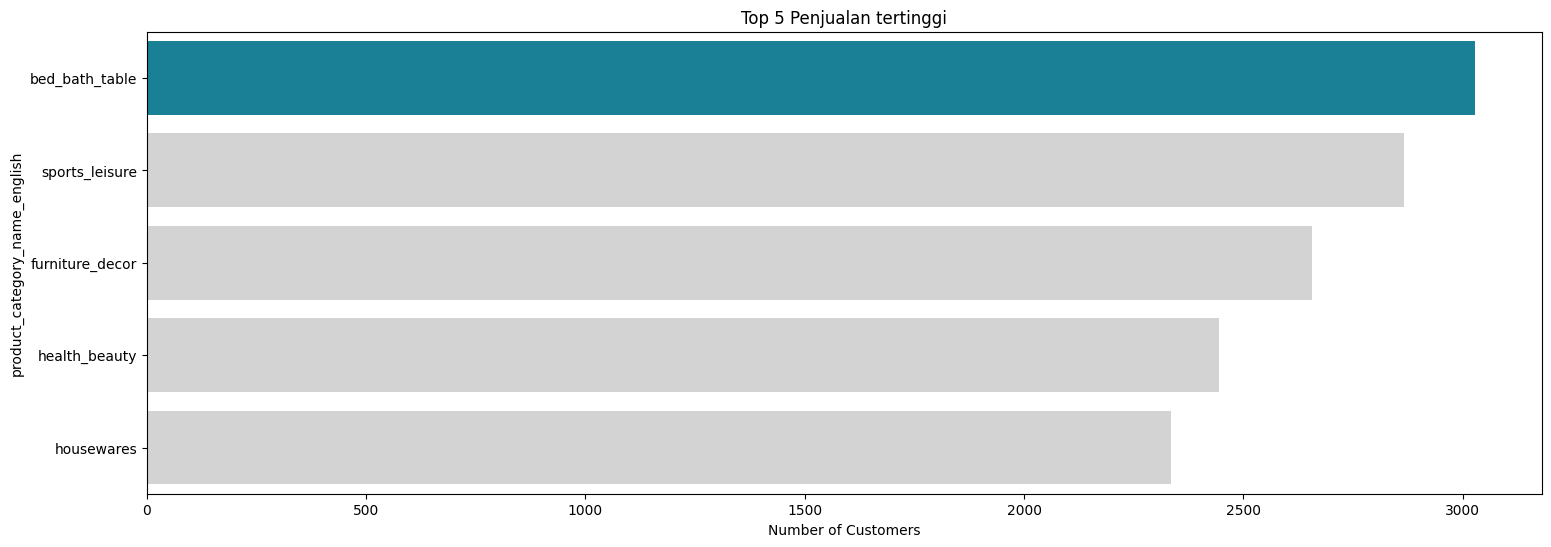

In [ ]:
top_product = df10.groupby("product_category_name_english")["product_id"].count().reset_index()
fig, ax = plt.subplots(figsize=(18, 6))
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors)
plt.title('Top 5 Penjualan tertinggi')
plt.xlabel('Number of Customers')
plt.show()

### Pertanyaan 2 : Bagaimana Demografi Pelanggan yang Kita Miliki?
- distribusi customer berdasarkan kota (customer_city)

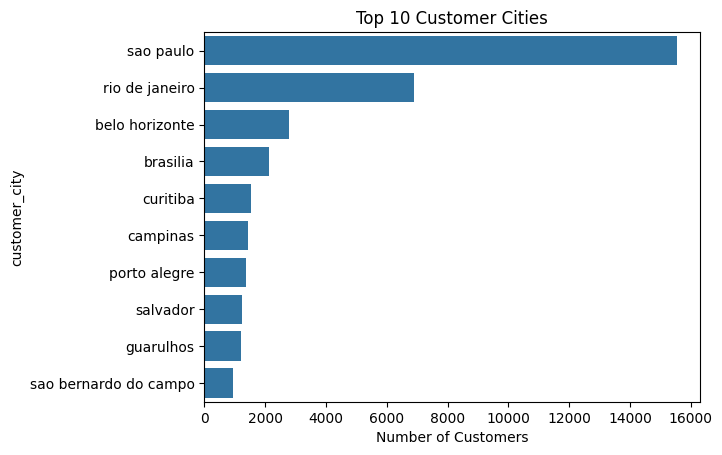

In [ ]:
top_cities = df1['customer_city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Customer Cities')
plt.xlabel('Number of Customers')
plt.show()

dapat dilihat jika kota sao paulo menjadi kota dengan distribusi customer terbanyak dan disusul dengan rio de janeiro setelahnya

- distribusi customer berdasarkan negara bagian (customer_state)

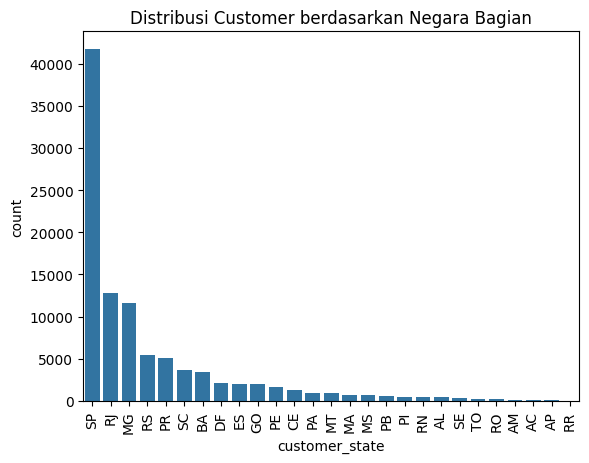

In [ ]:
sns.countplot(x=df1['customer_state'], order=df1['customer_state'].value_counts().index)
plt.title('Distribusi Customer berdasarkan Negara Bagian')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 3 : Tipe pembayaran yang sering digunakan?

<ipython-input-69-e8a79cfc6e00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="unique_orders", y="payment_type", data=payment_data, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

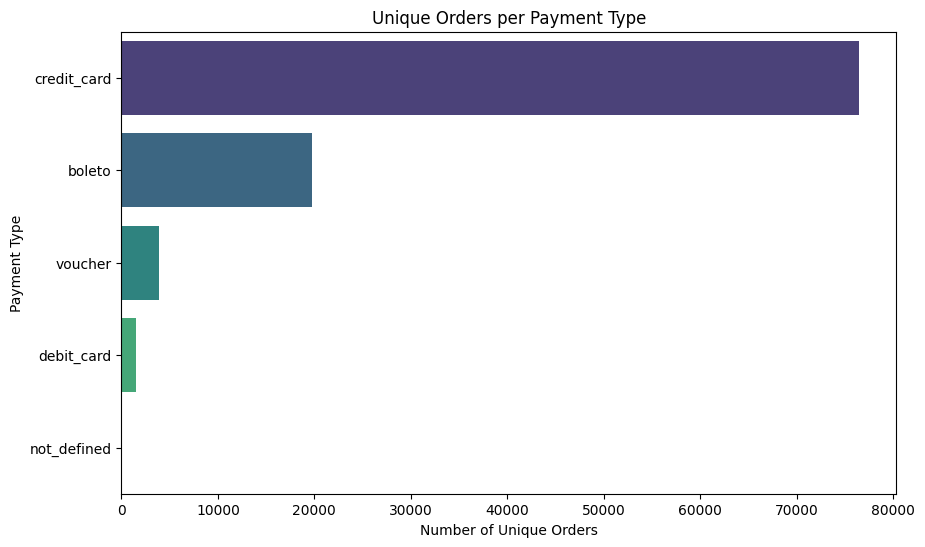

In [ ]:
payment_data = df4.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()
payment_data = payment_data.rename(columns={"order_id": "unique_orders"})
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="unique_orders", y="payment_type", data=payment_data, palette="viridis")
plt.title('Unique Orders per Payment Type')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Payment Type')
plt.show()

## Analisis Lanjutan (RFM Analysis)

In [ ]:
df2['shipping_limit_date'] = pd.to_datetime(df2['shipping_limit_date'], errors='coerce')

rfm_df = df2.groupby(by="order_id", as_index=False).agg({
    "shipping_limit_date": "max",  # Mengambil tanggal order terakhir
    "order_id": "nunique",  # Menghitung jumlah order (order_id)
    "price": "sum"  # Menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "monetary"]
print(rfm_df["max_order_timestamp"].dtype)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"], errors='coerce')
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df2["shipping_limit_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df["frequency"] = df2.groupby("order_id")["order_id"].transform('nunique')
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Tampilkan hasil
rfm_df.head()


int64


,customer_id,monetary,recency,frequency
0,2017-09-19 09:45:35,58.90,18361,1
1,2017-05-03 11:05:13,239.90,18361,1
2,2018-01-18 14:48:30,199.00,18361,1
3,2018-08-15 10:10:18,12.99,18361,1
4,2017-02-13 13:57:51,199.90,18361,1


## Conclusion

### Pertanyaan 1: Item apa yang memiliki tingkat penjualan tertinggi?
Item dengan penjualan tertinggi adalah produk bed bath table, yang tercatat memiliki jumlah penjualan sebanyak 3029 unit. Hal ini menunjukkan bahwa produk tersebut memiliki performa penjualan yang sangat baik dan merupakan salah satu produk paling populer di antara pelanggan. Produk dengan penjualan tinggi dapat didorong lebih lanjut melalui promosi atau stok yang lebih besar, sementara produk dengan penjualan rendah memerlukan evaluasi lebih lanjut untuk memahami penyebabnya dan mengambil langkah yang tepat untuk meningkatkan penjualan.

### Pertanyaan 2: Bagaimana Demografi Pelanggan berdasarkan kota dan negara bagian
Visualisasi bar chart yang menunjukkan jumlah pesanan dari berbagai kota mengungkapkan bahwa terdapat beberapa kota dengan jumlah pesanan yang jauh lebih tinggi dibandingkan yang lain. Kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte mendominasi jumlah pesanan, mengindikasikan bahwa pelanggan yang berada di kota metropolitan utama di Brasil adalah kontributor terbesar dalam penjualan.Secara umum, pola ini menunjukkan bahwa Olist paling sukses dalam menarik pelanggan dari daerah perkotaan dan negara bagian dengan populasi tinggi dan daya beli yang kuat. Kota-kota besar dan pusat ekonomi memiliki peran penting dalam volume penjualan. Sebaliknya, daerah-daerah dengan jumlah pesanan yang lebih rendah cenderung terletak di wilayah yang kurang padat penduduk dan mungkin memiliki akses terbatas terhadap infrastruktur e-commerce.

### Pertanyaan 3 : Tipe pembayaran apa yang sering digunakan?
diperoleh hasil jika customer paling banyak menggunakan creadit card dalam melakukan transaksi

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import pickle

In [ ]:
# Model yang ingin disimpan adalah 'rfm_df'
model = rfm_df

In [ ]:
# Menyimpan model ke file .sav
filename = 'CustomerRFM_model.sav'
pickle.dump(model, open(filename, 'wb'))